# Track Waypoints Visualization

- Track Information  
<https://github.com/aws-deepracer-community/deepracer-race-data/tree/main/raw_data/tracks>
- Author: ai-castle
  - <https://www.ai-castle.com>
  - <edu@ai-castle.com>
  

In [1]:
!git clone https://github.com/aws-deepracer-community/deepracer-race-data.git

Cloning into 'deepracer-race-data'...
remote: Enumerating objects: 608124, done.
remote: Counting objects: 100% (381/381), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 608124 (delta 263), reused 248 (delta 131), pack-reused 607743 (from 3)
Receiving objects: 100% (608124/608124), 342.61 MiB | 16.06 MiB/s, done.
Resolving deltas: 100% (446590/446590), done.
You can inspect what was checked out with 'git status'
and retry with 'git restore --source=HEAD :/'

^C


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

def track_show(npy_name, index_interval = 5, index_fontsize=10):
    # npy_folder_path = "deepracer-race-data/raw_data/tracks/npy"
    # numpy_file_path = os.path.join(npy_folder_path, npy_name)
    track_arr = np.load(npy_name, allow_pickle=True).item() # Load as a dictionary

    # Get track waypoints
    track_C = track_arr['center']  # Center coordinate of the track
    track_L = track_arr['inner']  # Left coordinate of the track
    track_R = track_arr['outer']  # Right coordinate of the track

    # Visualization
    w = track_C[:,0].max() - track_C[:,0].min()
    h = track_C[:,1].max() - track_C[:,1].min()
    plt.figure(figsize = (10, 10 * (h/w)))
    plt.scatter(track_C[:,0],track_C[:,1], s = 15)
    plt.plot(track_L[:,0],track_L[:,1], c='red')
    plt.plot(track_R[:,0],track_R[:,1], c='blue')

    # Show indices
    for i, (x, y) in enumerate(track_C) :
        if i % index_interval == 0 :
            plt.text(x+0.1, y, i, fontsize=index_fontsize)

    # Output
    plt.title(npy_name)
    plt.show()

- Visualization

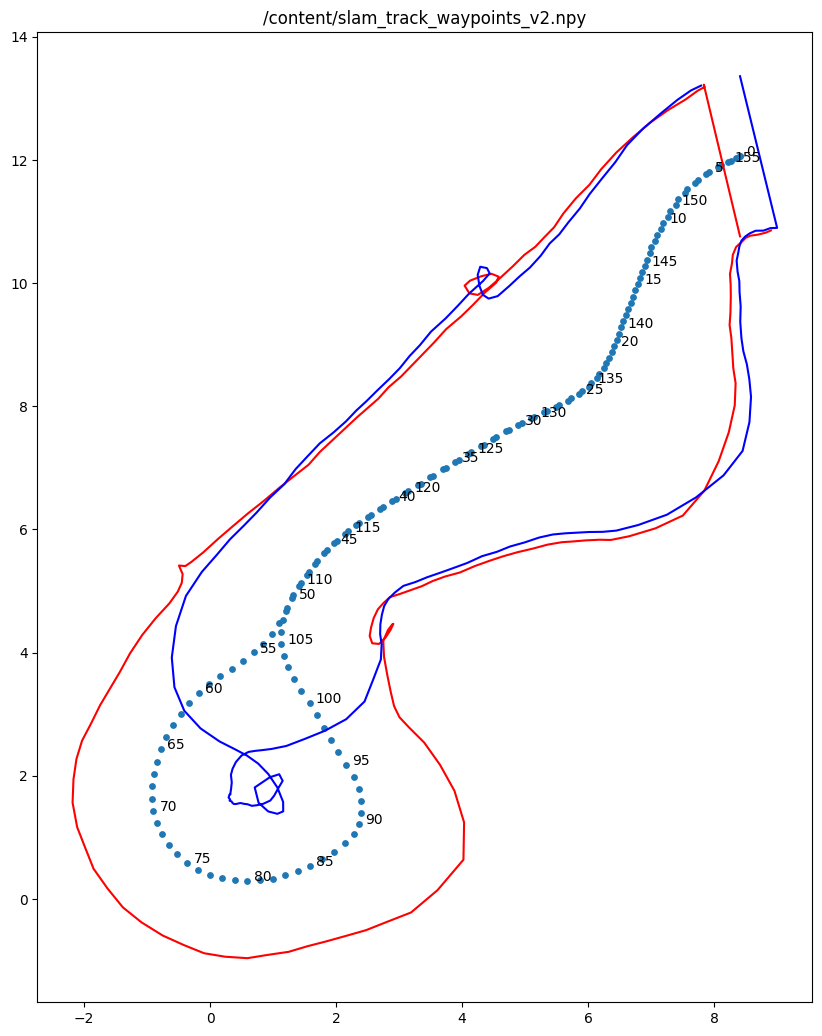

In [17]:
track_show(
    npy_name = "/content/slam_track_waypoints_v2.npy",   # Name of the numpy file containing the track waypoints
    index_interval = 5,     # Interval between the indices of the waypoints
    index_fontsize = 10,    # Font size of the waypoint indices
)